# Úloha 2: Bazilejský problém

*diskretizační × zaokrouhlovací chyby, Richardsonova extrapolace*

Bazilejský problém byl formulován v roce 1650 Pietrem Mengolim a vyřešen Leonhardem Eulerem v roce 1734, čímž si vysloužil světovou proslulost. Problém spočívá v nalezení součtu řady

$$
\sum_{n=1}^{\infty} \frac{1}{n^2}
=
\frac{1}{1^2} + \frac{1}{2^2} + \frac{1}{3^2} + \cdots
=
\lim_{N \to \infty} S_N.
$$

Vaším úkolem bude nalézt součet této řady numericky, pokud možno s plnou přesností v `double precision` aritmetice. Podrobné instrukce:

- Nalezněte posloupnost částečných součtů $S_N$ pro $N = 2^k$ a $k = 1,2,\ldots,20$ a nakreslete v log–log škále graf závislosti chyby $|S_N - S_\infty|$ na $N$.  
  Za $S_\infty$ vezměte hodnotu odpovídající největšímu $N$.


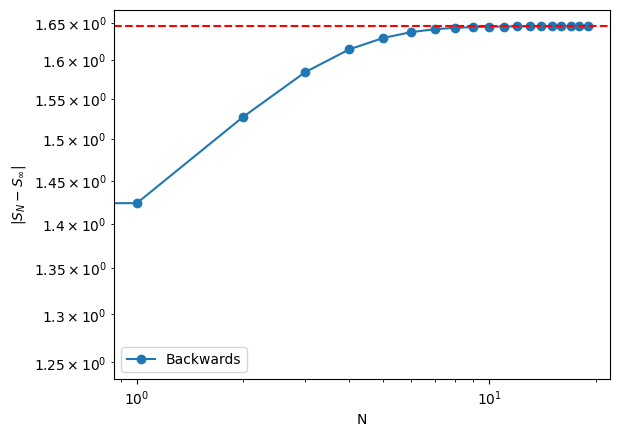

In [32]:
import numpy as np
import matplotlib.pyplot as plt
sn = []
for k in range(1,21):
    sn.append(np.sum([1/i**2 for i in range(2**k, 0, -1)]))

plt.loglog(sn,  'o-', label = "Backwards")
plt.xlabel("N")
plt.ylabel(r"$|S_N - S_{\infty}|$")
plt.axhline(np.pi**2/6, color="r", linestyle="--")
plt.legend()
plt.show()


- Vytvořte si hypotézu, jaká je analytická závislost chyby na $N$, a pokuste se tuto chybu odstranit Richardsonovou extrapolací.  
  Tímto způsobem vytvořte korigovanou posloupnost částečných součtů $\tilde{S}_N$ a nakreslete graf závislosti chyby korigované posloupnosti na $N$. Opět se pokuste nalézt analytickou závislost této chyby.



[1.5972222222222223 1.6312329931972789 1.6412710147357792
 1.6439879922108613 1.6446937399898507 1.6448735085000363
 1.6449188676628992 1.644930259601513  1.644933114105232
 1.6449338285460626 1.6449340072581338 1.6449340519488842
 1.6449340631231637 1.6449340659169323 1.6449340666153995
 1.6449340667900192 1.6449340668336745 1.6449340668445884
 1.644934066847317 ]
1.6449340668482264


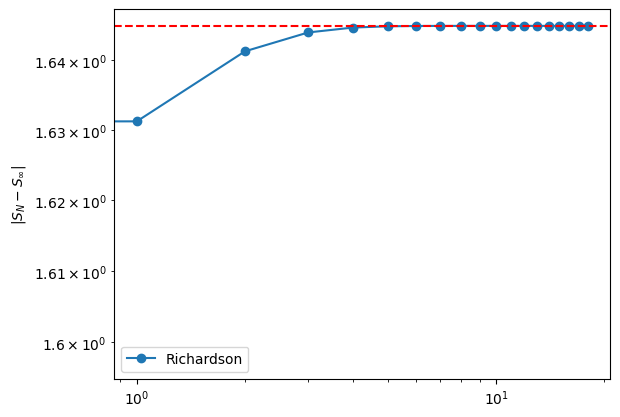

In [31]:
N_vals = np.array([2**k for k in range(1, 21)])
S = np.array(sn)

S_rich = 2*S[1:] - S[:-1] #S has only powers of two, so we start with initial one-off - tilde S 2n = 2S 2n - S n
np.set_printoptions(precision=16)
print(S_rich)
print(np.pi**2/6)
# plt.loglog(N_vals, 'o-', label="S_N")
plt.loglog(S_rich, 'o-', label="Richardson")
plt.ylabel(r"$|S_N - S_{\infty}|$")
plt.axhline(np.pi**2/6, color="r", linestyle="--")
plt.legend()
plt.show()

- Postup opakujte tak dlouho, dokud nedostanete výsledky nezatížené diskretizační chybou. Porovnejte, jak se liší zaokrouhlovací chyby výsledků, když $S_N$ sčítáte odpředu nebo odzadu.

Výstupem úlohy jsou grafy závislosti diskretizační chyby aproximace $S_N - S_\infty$ na $N$, ukázka vámi odhadnuté analytické závislosti těchto chyb a dále co nejpřesnější hodnota veličiny $S_\infty$.


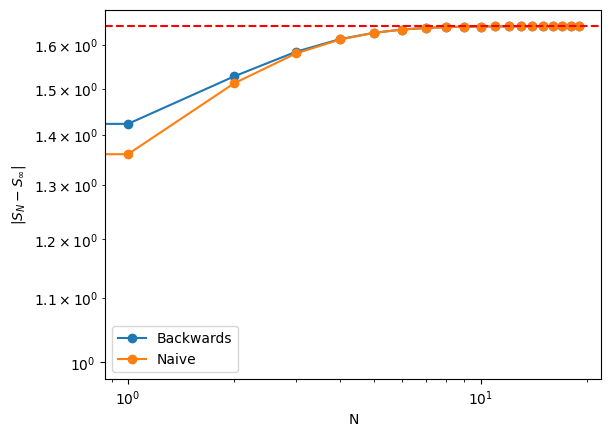

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

an = []
for k in range(1,21):
    an.append(np.sum([1/i**2 for i in range(1,2**k)]))

plt.loglog(sn,  'o-', label = "Backwards")
plt.loglog(an,  'o-', label = "Naive")
plt.xlabel("N")
plt.ylabel(r"$|S_N - S_{\infty}|$")
plt.axhline(np.pi**2/6, color="r", linestyle="--")
plt.legend()
plt.show()